## Criando nomes

In [2]:
import pandas as pd

In [3]:
nomes_m = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=m")
nomes_f = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=f")

In [5]:
len(nomes_f) + len(nomes_m)

400

In [8]:
frames = [nomes_f, nomes_m]
frames

[          nome  regiao      freq  rank sexo
 0        MARIA       0  11694738     1    F
 1          ANA       0   3079729     2    F
 2    FRANCISCA       0    721637     3    F
 3      ANTONIA       0    588783     4    F
 4      ADRIANA       0    565621     5    F
 ..         ...     ...       ...   ...  ...
 195     ROSANE       0     82203   196    F
 196    IVONETE       0     81878   197    F
 197    LUCIANE       0     81230   198    F
 198    ISADORA       0     81100   199    F
 199      NILZA       0     80128   200    F
 
 [200 rows x 5 columns],
           nome  regiao     freq  rank sexo
 0         JOSE       0  5732508     1    M
 1         JOAO       0  2971935     2    M
 2      ANTONIO       0  2567494     3    M
 3    FRANCISCO       0  1765197     4    M
 4       CARLOS       0  1483121     5    M
 ..         ...     ...      ...   ...  ...
 195     WALTER       0    67207   196    M
 196    ARLINDO       0    66669   197    M
 197    MICHAEL       0    65736   19

In [9]:
nomes = pd.concat(frames)['nome'].to_frame()

In [10]:
nomes.sample(5)

,nome
142,HUGO
80,EMERSON
103,KATIA
117,WAGNER
158,EDIVALDO


## Incluindo ID dos alunos

In [11]:
import numpy as np
np.random.seed(123)

In [12]:
total_alunos = len(nomes)
total_alunos

400

In [13]:
nomes["id_aluno"] = np.random.permutation(total_alunos) + 1

In [14]:
nomes.sample(5)

,nome,id_aluno
188,POLIANA,369
57,DAIANE,303
3,FRANCISCO,382
182,CHARLES,33
30,ANDERSON,111


In [15]:
dominios = ['@dominiodoemail.com.br', '@servicodoemail.com']
nomes['dominio'] = np.random.choice(dominios, total_alunos)

In [16]:
nomes.sample(5)

,nome,id_aluno,dominio
84,SEVERINO,78,@dominiodoemail.com.br
0,JOSE,331,@servicodoemail.com
179,IAGO,340,@dominiodoemail.com.br
10,SANDRA,174,@dominiodoemail.com.br
171,TERESINHA,45,@dominiodoemail.com.br


In [17]:
nomes['email'] = nomes.nome.str.cat(nomes.dominio).str.lower()

In [18]:
nomes.sample(5)

,nome,id_aluno,dominio,email
114,ARTHUR,320,@dominiodoemail.com.br,arthur@dominiodoemail.com.br
57,DAIANE,303,@servicodoemail.com,daiane@servicodoemail.com
85,HELENA,221,@dominiodoemail.com.br,helena@dominiodoemail.com.br
183,IRACI,8,@dominiodoemail.com.br,iraci@dominiodoemail.com.br
189,DALVA,137,@dominiodoemail.com.br,dalva@dominiodoemail.com.br


## Criando a tabela Cursos

In [20]:
import html5lib

In [24]:
nome_cursos = ['Nome do curso', 'Lógica de programação', 'Java para Web', 'C',
    'Ruby on Rails', 'Cursos de Python', 'PHP com MySql', '.NET para web', 'Novas integrações com Java',
    'TDD com Java', 'Código limpo com C', 'Preparatório para certificação Java', 'Hardware básico',
    'Persistência com .NET', 'Desenvolvendo jogos', 'Análise de dados', 'Estatística básica', 'Internet das coisas',
    'Programação funcional', 'Boas práticas em Java', 'Orientação objetos com Java']

In [25]:
cursos = pd.DataFrame(nome_cursos)

In [26]:
cursos = cursos.rename(columns={'Nome do curso' : 'nome_do_curso'})

,0
0,Nome do curso
1,Lógica de programação
2,Java para Web
3,C
4,Ruby on Rails
5,Cursos de Python
6,PHP com MySql
7,.NET para web
8,Novas integrações com Java
9,TDD com Java


In [29]:
cursos = cursos.rename(columns={0 : 'nome_do_curso'})

In [30]:
cursos.head(2)

,nome_do_curso
0,Nome do curso
1,Lógica de programação


In [31]:
cursos['id'] = cursos.index + 1

In [32]:
cursos.head()

,nome_do_curso,id
0,Nome do curso,1
1,Lógica de programação,2
2,Java para Web,3
3,C,4
4,Ruby on Rails,5


In [33]:
cursos = cursos.set_index('id')

In [35]:
cursos.head()

,nome_do_curso
id,
1,Nome do curso
2,Lógica de programação
3,Java para Web
4,C
5,Ruby on Rails


## Matriculando os alunos nos cursos

In [37]:
nomes['matriculas'] = np.ceil(np.random.exponential(size=total_alunos) * 1.5).astype(int) 

In [38]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
105,MILENA,371,@dominiodoemail.com.br,milena@dominiodoemail.com.br,2
183,IRACI,8,@dominiodoemail.com.br,iraci@dominiodoemail.com.br,1
10,LUIS,125,@dominiodoemail.com.br,luis@dominiodoemail.com.br,2
139,OSMAR,71,@dominiodoemail.com.br,osmar@dominiodoemail.com.br,2
40,SERGIO,139,@servicodoemail.com,sergio@servicodoemail.com,2


In [39]:
nomes.matriculas.describe()

count    400.000000
mean       2.135000
std        1.515757
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       12.000000
Name: matriculas, dtype: float64

In [40]:
import seaborn as sns

C:\Users\Micaeld\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='matriculas', ylabel='Density'>

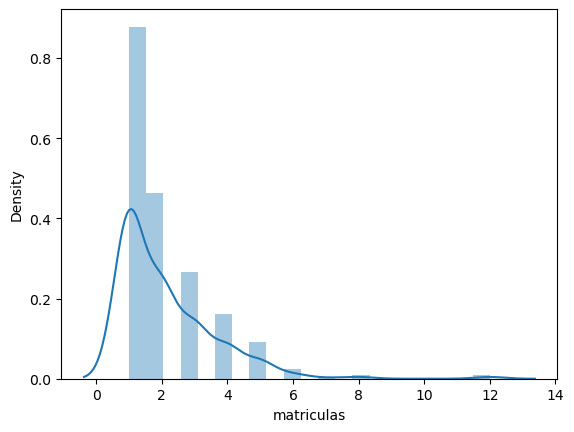

In [41]:
sns.distplot(nomes.matriculas)

In [42]:
nomes.matriculas.value_counts()

1     184
2      97
3      56
4      34
5      19
6       5
12      2
8       2
7       1
Name: matriculas, dtype: int64

In [43]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
103,MAICON,295,@servicodoemail.com,maicon@servicodoemail.com,4
44,RAIMUNDA,259,@servicodoemail.com,raimunda@servicodoemail.com,5
50,RAFAELA,27,@dominiodoemail.com.br,rafaela@dominiodoemail.com.br,3
171,TERESINHA,45,@dominiodoemail.com.br,teresinha@dominiodoemail.com.br,1
41,CLAUDIO,204,@servicodoemail.com,claudio@servicodoemail.com,1


## Selecionando cursos

In [52]:
todas_matriculas = []
x = np.random.rand(21)
prob = x  / sum(x)

In [53]:
for index, row in nomes.iterrows():
    id = row.id_aluno
    matriculas = row.matriculas
    for i in range(matriculas):
        mat = [id, np.random.choice(cursos.index, p = prob)]
        todas_matriculas.append(mat)
    
matriculas = pd.DataFrame(todas_matriculas, columns = ['id_aluno', 'id_curso'])

In [54]:
matriculas.head()

,id_aluno,id_curso
0,235,10
1,43,12
2,304,18
3,304,5
4,304,6


In [55]:
matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno':'quantidade_de_alunos'})

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,69,Nome do curso
2,27,Lógica de programação
3,36,Java para Web
4,45,C
5,70,Ruby on Rails
6,26,Cursos de Python
7,32,PHP com MySql
8,53,.NET para web
9,7,Novas integrações com Java


In [56]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
0,MARIA,235,@dominiodoemail.com.br,maria@dominiodoemail.com.br,1
16,EDUARDO,224,@dominiodoemail.com.br,eduardo@dominiodoemail.com.br,1
94,JAIR,344,@dominiodoemail.com.br,jair@dominiodoemail.com.br,1


In [57]:
cursos.head()

,nome_do_curso
id,
1,Nome do curso
2,Lógica de programação
3,Java para Web
4,C
5,Ruby on Rails


In [58]:
matriculas.head()

,id_aluno,id_curso
0,235,10
1,43,12
2,304,18
3,304,5
4,304,6


In [59]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno':'quantidade_de_alunos'})

In [60]:
matriculas_por_curso

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,69,Nome do curso
2,27,Lógica de programação
3,36,Java para Web
4,45,C
5,70,Ruby on Rails
6,26,Cursos de Python
7,32,PHP com MySql
8,53,.NET para web
9,7,Novas integrações com Java


## Saída em diferentes formatos

In [63]:
matriculas_por_curso.to_csv('data/matriculas_por_curso.csv', index=False)

In [93]:
matriculas_por_curso = pd.read_csv('data/matriculas_por_curso.csv')

In [94]:
matriculas_json = matriculas_por_curso.to_json()

In [95]:
matriculas_json

'{"quantidade_de_alunos":{"0":69,"1":27,"2":36,"3":45,"4":70,"5":26,"6":32,"7":53,"8":7,"9":55,"10":2,"11":38,"12":7,"13":55,"14":52,"15":64,"16":48,"17":79,"18":29,"19":1,"20":59},"nome_do_curso":{"0":"Nome do curso","1":"L\\u00f3gica de programa\\u00e7\\u00e3o","2":"Java para Web","3":"C","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySql","7":".NET para web","8":"Novas integra\\u00e7\\u00f5es com Java","9":"TDD com Java","10":"C\\u00f3digo limpo com C","11":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","12":"Hardware b\\u00e1sico","13":"Persist\\u00eancia com .NET","14":"Desenvolvendo jogos","15":"An\\u00e1lise de dados","16":"Estat\\u00edstica b\\u00e1sica","17":"Internet das coisas","18":"Programa\\u00e7\\u00e3o funcional","19":"Boas pr\\u00e1ticas em Java","20":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

In [96]:
matriculas_html = matriculas_por_curso.to_html()

In [97]:
print(matriculas_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>quantidade_de_alunos</th>
      <th>nome_do_curso</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>69</td>
      <td>Nome do curso</td>
    </tr>
    <tr>
      <th>1</th>
      <td>27</td>
      <td>Lógica de programação</td>
    </tr>
    <tr>
      <th>2</th>
      <td>36</td>
      <td>Java para Web</td>
    </tr>
    <tr>
      <th>3</th>
      <td>45</td>
      <td>C</td>
    </tr>
    <tr>
      <th>4</th>
      <td>70</td>
      <td>Ruby on Rails</td>
    </tr>
    <tr>
      <th>5</th>
      <td>26</td>
      <td>Cursos de Python</td>
    </tr>
    <tr>
      <th>6</th>
      <td>32</td>
      <td>PHP com MySql</td>
    </tr>
    <tr>
      <th>7</th>
      <td>53</td>
      <td>.NET para web</td>
    </tr>
    <tr>
      <th>8</th>
      <td>7</td>
      <td>Novas integrações com Java</td>
    </tr>
    <tr>
      <th>9</th>
      <td>55</td>
   

## Criando o banco sql

In [98]:
from sqlalchemy import create_engine, MetaData, Table

In [99]:
engine = create_engine('sqlite:///:memory:')

In [100]:
engine

Engine(sqlite:///:memory:)

In [101]:
type(engine)

sqlalchemy.engine.base.Engine

In [102]:
matriculas_por_curso.to_sql('matriculas', engine)

21

In [103]:
print(engine.table_names())

['matriculas']


C:\Users\Micaeld\AppData\Local\Temp\ipykernel_4768\1043810782.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  print(engine.table_names())


## Buscando do banco sql

In [104]:
query = 'select * from matriculas where quantidade_de_alunos < 20'

In [105]:
pd.read_sql(query, engine)

,index,quantidade_de_alunos,nome_do_curso
0,8,7,Novas integrações com Java
1,10,2,Código limpo com C
2,12,7,Hardware básico
3,19,1,Boas práticas em Java


In [106]:
pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'quantidade_de_alunos'])

,nome_do_curso,quantidade_de_alunos
0,Nome do curso,69
1,Lógica de programação,27
2,Java para Web,36
3,C,45
4,Ruby on Rails,70
5,Cursos de Python,26
6,PHP com MySql,32
7,.NET para web,53
8,Novas integrações com Java,7
9,TDD com Java,55


In [107]:
muitas_matriculas = pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'quantidade_de_alunos'])

In [108]:
muitas_matriculas = muitas_matriculas.query('quantidade_de_alunos > 80')

In [109]:
muitas_matriculas

,nome_do_curso,quantidade_de_alunos


## Escrevendo no banco

In [110]:
muitas_matriculas.to_sql('muitas_matriculas', con=engine)

0

In [111]:
print(engine.table_names())

['matriculas', 'muitas_matriculas']


C:\Users\Micaeld\AppData\Local\Temp\ipykernel_4768\1043810782.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  print(engine.table_names())


## Nomes dos alunos e alunas da próxima turma

In [113]:
matriculas_por_curso.head()

,quantidade_de_alunos,nome_do_curso
0,69,Nome do curso
1,27,Lógica de programação
2,36,Java para Web
3,45,C
4,70,Ruby on Rails


In [114]:
matriculas

,id_aluno,id_curso
0,235,10
1,43,12
2,304,18
3,304,5
4,304,6
...,...,...
849,323,21
850,323,12
851,383,14
852,366,1


In [115]:
id_curso = 16
proxima_turma = matriculas.query("id_curso == {}".format(id_curso))
proxima_turma

,id_aluno,id_curso
42,163,16
43,42,16
44,10,16
55,80,16
59,49,16
...,...,...
787,3,16
794,69,16
811,74,16
819,114,16


In [116]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
113,ROBERTA,143,@dominiodoemail.com.br,roberta@dominiodoemail.com.br,1
78,SILVIA,115,@servicodoemail.com,silvia@servicodoemail.com,4
64,VIVIANE,396,@servicodoemail.com,viviane@servicodoemail.com,3


In [117]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))

,id_curso,nome,dominio,email,matriculas
id_aluno,,,,,
3,16,VALDEMIR,@dominiodoemail.com.br,valdemir@dominiodoemail.com.br,3
10,16,MARIANA,@servicodoemail.com,mariana@servicodoemail.com,4
21,16,BIANCA,@servicodoemail.com,bianca@servicodoemail.com,3
22,16,LUCIENE,@dominiodoemail.com.br,luciene@dominiodoemail.com.br,5
29,16,LUCAS,@servicodoemail.com,lucas@servicodoemail.com,2
...,...,...,...,...,...
394,16,JOELMA,@dominiodoemail.com.br,joelma@dominiodoemail.com.br,4
396,16,VIVIANE,@servicodoemail.com,viviane@servicodoemail.com,3
397,16,LILIAN,@dominiodoemail.com.br,lilian@dominiodoemail.com.br,1


In [118]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome']

id_aluno
3      VALDEMIR
10      MARIANA
21       BIANCA
22      LUCIENE
29        LUCAS
         ...   
394      JOELMA
396     VIVIANE
397      LILIAN
398    CRISTIAN
400       FABIO
Name: nome, Length: 64, dtype: object

In [119]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

,nome
id_aluno,
3,VALDEMIR
10,MARIANA
21,BIANCA
22,LUCIENE
29,LUCAS
...,...
394,JOELMA
396,VIVIANE
397,LILIAN


In [120]:
nome_curso = cursos.loc[id_curso]
nome_curso

nome_do_curso    Análise de dados
Name: 16, dtype: object

In [121]:
nome_curso = nome_curso.nome_do_curso
nome_curso

'Análise de dados'

In [131]:
proxima_turma = proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

KeyError: "None of ['id_aluno'] are in the columns"

In [132]:
proxima_turma = proxima_turma.rename(columns = {'nome': 'Alunos do curso de {}'.format(nome_curso)})

In [133]:
proxima_turma

,Alunos do curso de Análise de dados
id_aluno,
3,VALDEMIR
10,MARIANA
21,BIANCA
22,LUCIENE
29,LUCAS
...,...
394,JOELMA
396,VIVIANE
397,LILIAN


In [ ]:
_